In [5]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import cv2
from matplotlib import image

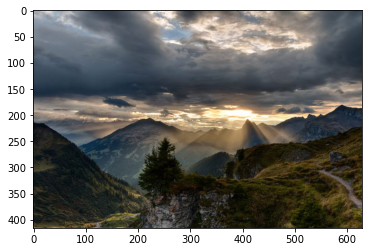

In [7]:
img=plt.imread("./../pic/montain.jpg")
plt.imshow(img)

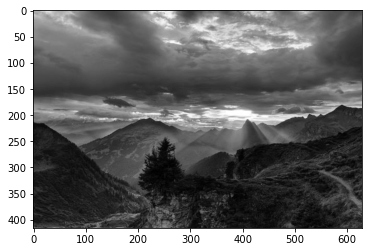

In [8]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray")

In [9]:
# 求fft
fft_img=np.fft.fftshift(np.fft.fft2(img_gray))

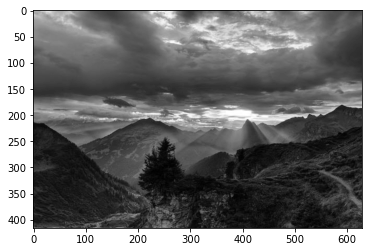

In [10]:
# 求ifft
origin_img=np.fft.ifft2(np.fft.fftshift(fft_img))
plt.imshow(np.abs(origin_img),cmap="gray")

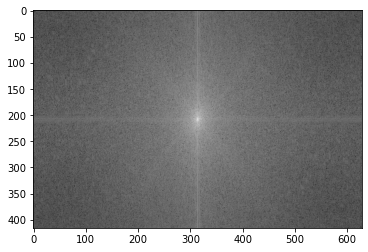

In [11]:
# 幅度谱 取log
fuzhi=np.log10(np.abs(fft_img))
plt.imshow(fuzhi,cmap="gray")

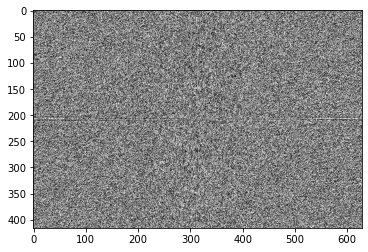

In [12]:
# 相位谱
imaginary=np.imag(fft_img)
real=np.real(fft_img)
xiangwei=np.arctan(imaginary/real)
plt.imshow(xiangwei,cmap="gray")

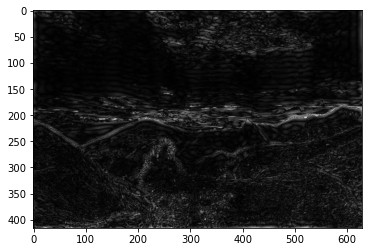

In [13]:
# 保留高频部分
fft_img=np.fft.fftshift(np.fft.fft2(img_gray))
fft_copy=fft_img.copy()
fft_copy[188:228,294:334]=0
high_f=np.abs(np.fft.ifft2(np.fft.fftshift(fft_copy)))
plt.imshow(high_f,cmap="gray")



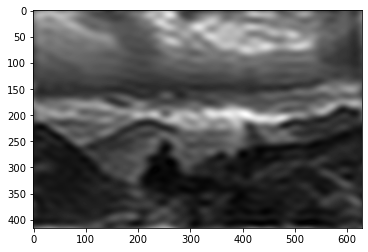

In [14]:
# 保留低频部分
fft_copy=fft_img.copy()
fft_copy[188:228,294:334]=0
low_f=np.abs(np.fft.ifft2(np.fft.fftshift(fft_img-fft_copy)))
plt.imshow(low_f,cmap="gray")

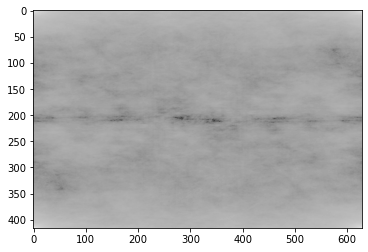

In [15]:
# 只保留幅度部分
fft_img=np.fft.fftshift(np.fft.fft2(img_gray))
fuzhi=np.abs(fft_img)
keep_mag=np.log10(np.abs(np.fft.ifft2(np.fft.fftshift(fuzhi))))
plt.imshow(keep_mag,cmap="gray")

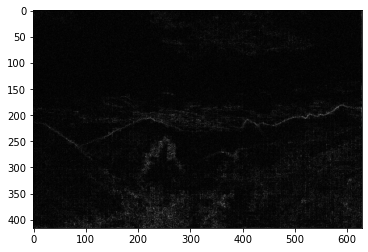

In [16]:
# 只保留相位 即 将幅度值归一化
fft_img=np.fft.fftshift(np.fft.fft2(img_gray))
fuzhi=np.abs(fft_img)
fft_normalized=np.divide(fft_img,fuzhi)
keep_theta=np.abs(np.fft.ifft2(np.fft.fftshift(fft_normalized)))
plt.imshow(keep_theta,cmap="gray")


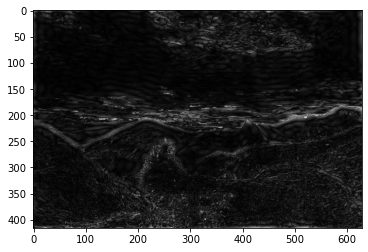

In [17]:
# 圆形的低通滤波器
r=20
filt=np.zeros_like(img_gray,dtype=np.bool_)
filt.shape
for i in range(416):
    for j in range(628):
        if (i-208)**2+(j-309)**2<=r**2:
            filt[i,j]=True



True_cod=np.argwhere(filt==True).T
fft_img=np.fft.fftshift(np.fft.fft2(img_gray))
circle_LPF=fft_img.copy()
circle_LPF[True_cod[0],True_cod[1]]=0
cir_img=np.abs(np.fft.ifft2(np.fft.fftshift(circle_LPF)))
plt.imshow(cir_img,cmap="gray")



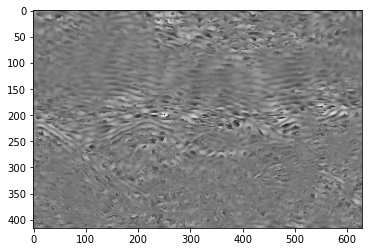

In [18]:
# 圆形低通滤波和方形所差的部分
plt.imshow(cir_img-high_f,cmap="gray")